## Colab Link

Colab Link:https://colab.research.google.com/drive/1MGrC6072x2grj2Xa40JtaYlnTeD8tik2?usp=sharing

In [ ]:
# Importing Everyhing We Need
from google.colab import drive
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, models, transforms
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import random
import PIL
!pip install ultralytics
from ultralytics import YOLO

  Using cached ultralytics-8.2.74-py3-none-any.whl.metadata (41 kB)
  Using cached ultralytics_thop-2.0.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using 

In [ ]:
#mount the drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive





*   From this point, we have gathered data from the stanford dog breed data set of more than 12000 images containing 120 dog species. All data is stored in google drive.
*   For the purpuse of testing, we have choosen a small portion of the data, containg only 992 samples of 5 species to reduce training time.  




In [ ]:
# Define Necessary Settings
small_test_path = '/content/gdrive/MyDrive/aps360smalltest'
img_width, img_height = 224, 224
channels = 3
batch_size = 64
num_images= 992
image_arr_size= img_width * img_height * channels

In [ ]:
cd /content/gdrive/MyDrive/aps360smalltest


/content/gdrive/.shortcut-targets-by-id/1H87uh8DLPkPkphCHYbyvF93o1YLh2xPo/aps360smalltest


In [ ]:
# Define the paths
small_test_folder = '.'  # Current directory
small_test_train_folder = 'train'
small_test_val_folder = 'val'
small_test_test_folder = 'test'

In [ ]:
first_time = False

In [ ]:
# Iterate through each class folder to split the images into train test and val
# WillOnly execute for the 1st time
# Any following times running will show "images already split"

if first_time:

  print("Splitting Images into 70% training, 15% validation, 15% testing")
  for class_folder in os.listdir(small_test_folder):
      class_path = os.path.join(small_test_folder, class_folder)
      if os.path.isdir(class_path):  # Check if it's a directory (class folder)

          # Create corresponding class folders in train, val, test
          os.makedirs(os.path.join(small_test_train_folder, class_folder), exist_ok=True)
          os.makedirs(os.path.join(small_test_val_folder, class_folder), exist_ok=True)
          os.makedirs(os.path.join(small_test_test_folder, class_folder), exist_ok=True)

          # Get the list of image files for this class
          image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

          # Split into train and temp (test + val)
          train_files, temp_files = train_test_split(image_files, test_size=0.3, random_state=42)

          # Split temp into val and test
          val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

          # Copy the files to their respective folders
          for file in train_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_train_folder, class_folder, file))
          for file in val_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_val_folder, class_folder, file))
          for file in test_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_test_folder, class_folder, file))

  first_time = False

else:
  print("Images Already Split")

Images Already Split


In [ ]:
# Define the paths again now that they are created
train_folder = '/content/gdrive/MyDrive/aps360smalltest/train'
val_folder = '/content/gdrive/MyDrive/aps360smalltest/val'
test_folder = '/content/gdrive/MyDrive/aps360smalltest/test'

# Count the images to check if we split it correctly
def count_images(folder):
    count = 0
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            count += len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    return count

train_count = count_images(train_folder)
val_count = count_images(val_folder)
test_count = count_images(test_folder)


total_count = train_count + val_count + test_count

# Print the number of images for train, test and val
print("Number of training images:", train_count, "({:.2f}%)".format(train_count/total_count * 100))
print("Number of validation images:", val_count, "({:.2f}%)".format(val_count/total_count * 100))
print("Number of testing images:", test_count, "({:.2f}%)".format(test_count/total_count * 100))

Number of training images: 699 (69.83%)
Number of validation images: 150 (14.99%)
Number of testing images: 152 (15.18%)


*   Now we have split the images into 70% training, 15% validation and 15% testing data
*   We create the data loader for training. Data Transform ensures all images are croped to same size



In [ ]:
# data transformations to crop the images into same size of 224*224
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match CNN input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize using ImageNet stats
])

# Load training data
train_dataset = datasets.ImageFolder(root='train', transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load validation data
val_dataset = datasets.ImageFolder(root='val', transform=data_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load test data
test_dataset = datasets.ImageFolder(root='test', transform=data_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



*   Now that we have the data loaders, we want to write and test a simple CNN baseline model for our future reference.



In [ ]:
# In this case of small data set, we only have 5 class of dogs
num_classes = 5

# This is the simple cnn we use for baseline model

class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.name = "Simple_Net"
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(32 * 56 * 56, 128) # 56 comes from [(224-3+2)/2 -3+2]/2, 32 represents 32 channels
    self.fc2 = nn.Linear(128, num_classes)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 32 * 56 * 56)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


In [ ]:
# Training
# Those are from lab4
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to value between 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to value between 0/1
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

In [ ]:
def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        # Get the inputs
        inputs, labels = data
        # Send data to device
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels.long())

        # Get predicted class indices
        _, predicted = torch.max(outputs.data, 1)
        # Compare predicted with actual labels
        corr = predicted != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

In [ ]:
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Train net function, changed from lab 4
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):

    # Define data transformations
    data_transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to match CNN input
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize using ImageNet stats
    ])

    # Load training data
    train_dataset = datasets.ImageFolder(root='train', transform=data_transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Load validation data
    val_dataset = datasets.ImageFolder(root='val', transform=data_transform)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Load test data
    test_dataset = datasets.ImageFolder(root='test', transform=data_transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize the model
    model = SimpleCNN()  # Replace SimpleCNN with your actual model class
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer =  optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)# Adjust learning rate as needed


    # Set up numpy arrays to store training/validation loss/accuracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
             # Calculate the statistics
            _, predicted = torch.max(outputs.data, 1) # Get predicted class index
            corr = predicted != labels.long() # Compare predicted class with actual label
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

In [ ]:
# Initialize the model
model1 = SimpleCNN()  # Replace SimpleCNN with your actual model class
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
)

In [ ]:
use_cuda = True
torch.cuda.empty_cache()

In [ ]:
# The function get accuracy, we will be using it to get the accuracy of our simple CNN
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad(): # disable gradient calculation
        for imgs, labels in data_loader:
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()
            output = model(imgs)
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(labels.view_as(pred)).sum().item()
            total += imgs.shape[0]
    return correct / total

In [ ]:
get_accuracy(model1, val_loader)

0.2



*   Now we see what accuracy our simple cnn is approximitely 20%, which is low.
*   It is also reasonable since this is a very simple CNN with only 2 convolutional layers, 1 max pooling layer and 2 linear layers.
*   This will act as our baseline model. The model we eventually build should be at least better than this.








*  Now we proceed to building our own CNN from scratch



*   Now we see how much accuracy our CNN built from scrach can get, we aim to maximize the performance of our task. We introduce transfer learning. Among those pretrained CNNs in the database, we find Alexnet most fit the purpose of our training. So we would perform transfer learing on Alexnet




In [ ]:
# Define necessary settings
master_path = '/content/gdrive/MyDrive/aps360smalltest'
img_width, img_height = 224, 224
channels = 3
batch_size = 64
num_images= 992
image_arr_size= img_width * img_height * channels

In [ ]:
cd /content/gdrive/MyDrive/aps360smalltest

/content/gdrive/.shortcut-targets-by-id/1H87uh8DLPkPkphCHYbyvF93o1YLh2xPo/aps360smalltest


In [ ]:
# Define the paths
image_folder = '.'
train_folder = 'train'
val_folder = 'val'
test_folder = 'test'


In [ ]:
# Iterate through each class folder to split the images into train test and val
# Will Only execute for the 1st time
# Any following times running will show "images already split"

if first_time:

  print("Splitting Images into 70% training, 15% validation, 15% testing")
  for class_folder in os.listdir(small_test_folder):
      class_path = os.path.join(small_test_folder, class_folder)
      if os.path.isdir(class_path):  # Check if it's a directory (class folder)

          # Create corresponding class folders in train, val, test
          os.makedirs(os.path.join(small_test_train_folder, class_folder), exist_ok=True)
          os.makedirs(os.path.join(small_test_val_folder, class_folder), exist_ok=True)
          os.makedirs(os.path.join(small_test_test_folder, class_folder), exist_ok=True)

          # Get the list of image files for this class
          image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

          # Split into train and temp (test + val)
          train_files, temp_files = train_test_split(image_files, test_size=0.3, random_state=42)

          # Split temp into val and test
          val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

          # Copy the files to their respective folders
          for file in train_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_train_folder, class_folder, file))
          for file in val_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_val_folder, class_folder, file))
          for file in test_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_test_folder, class_folder, file))

  first_time = False

else:
  print("Images Already Split")

Images Already Split


In [ ]:
# Define the paths again now that they have been created
train_folder = '/content/gdrive/MyDrive/aps360smalltest/train'
val_folder = '/content/gdrive/MyDrive/aps360smalltest/val'
test_folder = '/content/gdrive/MyDrive/aps360smalltest/test'

# Count the images to check if we split it correctly
def count_images(folder):
    count = 0
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            count += len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    return count

train_count = count_images(train_folder)
val_count = count_images(val_folder)
test_count = count_images(test_folder)


total_count = train_count + val_count + test_count

# Print the number of images for train, test and val
print("Number of training images:", train_count, "({:.2f}%)".format(train_count/total_count * 100))
print("Number of validation images:", val_count, "({:.2f}%)".format(val_count/total_count * 100))
print("Number of testing images:", test_count, "({:.2f}%)".format(test_count/total_count * 100))

Number of training images: 699 (69.83%)
Number of validation images: 150 (14.99%)
Number of testing images: 152 (15.18%)


In [ ]:
# Define data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match CNN input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize using ImageNet stats
])

# Load training data
train_dataset = datasets.ImageFolder(root='train', transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load validation data
val_dataset = datasets.ImageFolder(root='val', transform=data_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load test data
test_dataset = datasets.ImageFolder(root='test', transform=data_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)





*   Now we introduce Alexnet

In [ ]:
num_classes = 20


In [ ]:


alexnet = models.alexnet(pretrained=True)

#freeze model parameters, those pretrained alexnet parameters won't be updated during training
for param in alexnet.parameters():
  param.requires_grad = False

# We are adding final layers to AlexNet to fit our tasks for Transfer Learning
# In this case, since we are using small net data with only 5 classes,
# we are using small hidden layer size of 512 and drop out rate
# of 0.6 to make the model more accurate
alexnet.classifier.add_module("4", nn.Linear(4096, 512)) #softmax not added because we're using crossentropy
alexnet.classifier.add_module("6", nn.Dropout(p=0.5, inplace=False))
alexnet.classifier.add_module("7", nn.Linear(512, 256))
alexnet.classifier.add_module("8", nn.ReLU(inplace=True))
alexnet.classifier.add_module("9", nn.Linear(256, num_classes))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

*   Now we have made revelent modifications to Alexnet to fit our model, we implement the get accuracy function and the train function




In [ ]:
def get_accuracy_of_transfer(model, train=False):
    if train:
        data_loader = train_loader
    else:
        data_loader = val_loader

    #data_loader = train_loader  #might need to use the the if_statement later

    correct = 0
    total = 0
    for imgs, labels in data_loader:

        #Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        output = model(imgs)

        #select index with best prediction
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total



In [ ]:
# Here is the train function for alexnet transfer learning. We will be training this model to see how well it can perform
def train(model, model_name, learning_rate = 0.001, batch_size = 327, num_epochs = 1):

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)


    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(train_loader):

            #Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            if model_name == "alexnet":
              out = model(imgs)
              if n == 0:
                print("Using alexnet")
            elif model_name == 'resnet':
              if n == 0:
                print("Using resnet features")
            elif model_name == 'wide_resnet':
              if n == 0:
                print("Using wide_resnet features")
            else:
              if n == 0:
                print("Using efficientnet features")

            out = model(imgs)       # forward pass with resnet features
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch



            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole trainig set in every iteration!
            pred = out.max(1, keepdim=True)[1]
            mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            Mini_batch_total = imgs.shape[0]
            train_acc.append((mini_batch_correct / Mini_batch_total))
           ###########################

          # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            val_acc.append(get_accuracy_of_transfer(model, train=False))  # compute validation accuracy
            n += 1
            mini_b += 1
            print("Iteration: ",n,'Progress: % 6.2f ' % ((epoch * len(train_loader) + mini_b) / (num_epochs * len(train_loader))*100),'%', "Time Elapsed: % 6.2f s " % (time.time()-start_time))


        print ("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))


    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    train_acc.append(get_accuracy_of_transfer(model, train=True))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))



*  Now we train the model

CUDA is not available.  Training on CPU ...
Using alexnet
Iteration:  1 Progress:   0.91  % Time Elapsed:  28.95 s 
Iteration:  2 Progress:   1.82  % Time Elapsed:  56.63 s 
Iteration:  3 Progress:   2.73  % Time Elapsed:  83.12 s 
Iteration:  4 Progress:   3.64  % Time Elapsed:  112.67 s 
Iteration:  5 Progress:   4.55  % Time Elapsed:  138.74 s 
Iteration:  6 Progress:   5.45  % Time Elapsed:  166.16 s 
Iteration:  7 Progress:   6.36  % Time Elapsed:  193.84 s 
Iteration:  8 Progress:   7.27  % Time Elapsed:  218.59 s 
Iteration:  9 Progress:   8.18  % Time Elapsed:  244.88 s 
Iteration:  10 Progress:   9.09  % Time Elapsed:  272.74 s 
Iteration:  11 Progress:  10.00  % Time Elapsed:  298.05 s 
Epoch 0 Finished.  Time per Epoch:  298.05 s 
Iteration:  12 Progress:  10.91  % Time Elapsed:  309.97 s 
Iteration:  13 Progress:  11.82  % Time Elapsed:  322.26 s 
Iteration:  14 Progress:  12.73  % Time Elapsed:  334.46 s 
Iteration:  15 Progress:  13.64  % Time Elapsed:  346.21 s 
Iteratio

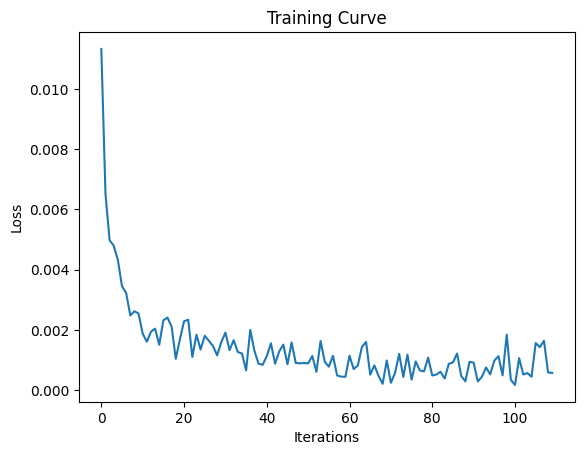

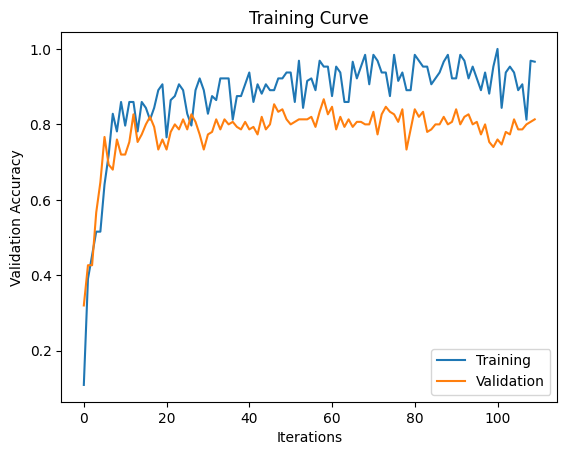

Final Training Accuracy: 0.9256080114449213
Final Validation Accuracy: 0.8133333333333334
Total time:   1504.77 s  Time per Epoch:  150.48 s 


In [ ]:
use_cuda = True
torch.cuda.empty_cache()

model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"
batch_size = 256

if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name, batch_size=batch_size, num_epochs=10)

*   Now we see how well our transfer learning model performs, we can proceed to using our large data set of 120 species and 12000 samples to see how well it performs.


*   Here we redefine the path to our large data set



In [ ]:
master_path = '/content/gdrive/MyDrive/aps360largetest/Images'
img_width, img_height = 224, 224
channels = 3
batch_size = 64
num_images= 992
image_arr_size= img_width * img_height * channels

In [ ]:
cd /content/gdrive/MyDrive/aps360largetest/Images


/content/gdrive/.shortcut-targets-by-id/1fLRn_-T5O6uh9f4YOAyHJSmQT7pYg_6y/Images


In [ ]:
# Define the paths
image_folder = '.'  # Current directory since you're already in the image folder
train_folder = 'train'
val_folder = 'val'
test_folder = 'test'


In [ ]:
if first_time:

  print("Splitting Images into 70% training, 15% validation, 15% testing")
  for class_folder in os.listdir(small_test_folder):
      class_path = os.path.join(small_test_folder, class_folder)
      if os.path.isdir(class_path):  # Check if it's a directory (class folder)

          # Create corresponding class folders in train, val, test
          os.makedirs(os.path.join(small_test_train_folder, class_folder), exist_ok=True)
          os.makedirs(os.path.join(small_test_val_folder, class_folder), exist_ok=True)
          os.makedirs(os.path.join(small_test_test_folder, class_folder), exist_ok=True)

          # Get the list of image files for this class
          image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

          # Split into train and temp (test + val)
          train_files, temp_files = train_test_split(image_files, test_size=0.3, random_state=42)

          # Split temp into val and test
          val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

          # Copy the files to their respective folders
          for file in train_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_train_folder, class_folder, file))
          for file in val_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_val_folder, class_folder, file))
          for file in test_files:
              shutil.copy(os.path.join(class_path, file), os.path.join(small_test_test_folder, class_folder, file))

  first_time = False

else:
  print("Images Already Split")

Images Already Split


In [ ]:

# Define the paths
train_folder = '/content/gdrive/MyDrive/aps360largetest/Images/train'
val_folder = '/content/gdrive/MyDrive/aps360largetest/Images/val'
test_folder = '/content/gdrive/MyDrive/aps360largetest/Images/test'

def count_images(folder):
    count = 0
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            count += len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    return count

train_count = count_images(train_folder)
val_count = count_images(val_folder)
test_count = count_images(test_folder)


total_count = train_count + val_count + test_count

print("Number of training images:", train_count, "({:.2f}%)".format(train_count/total_count * 100))
print("Number of validation images:", val_count, "({:.2f}%)".format(val_count/total_count * 100))
print("Number of testing images:", test_count, "({:.2f}%)".format(test_count/total_count * 100))

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/aps360largetest/Images/train'

In [ ]:
# Define data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match CNN input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize using ImageNet stats
])

# Load training data
train_dataset = datasets.ImageFolder(root='train', transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load validation data
val_dataset = datasets.ImageFolder(root='val', transform=data_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load test data
test_dataset = datasets.ImageFolder(root='test', transform=data_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
num_classes = 120
alexnet

In [ ]:
use_cuda = True
torch.cuda.empty_cache()

model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"
batch_size = 327

if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name, batch_size=batch_size, num_epochs=10)

CUDA is available!  Training on GPU ...
Using alexnet
Iteration:  1 Progress:   0.04  % Time Elapsed:  2344.04 s 
Iteration:  2 Progress:   0.09  % Time Elapsed:  2413.71 s 
Iteration:  3 Progress:   0.13  % Time Elapsed:  2482.66 s 
Iteration:  4 Progress:   0.18  % Time Elapsed:  2553.10 s 
Iteration:  5 Progress:   0.22  % Time Elapsed:  2623.15 s 
Iteration:  6 Progress:   0.27  % Time Elapsed:  2691.94 s 
Iteration:  7 Progress:   0.31  % Time Elapsed:  2759.37 s 
Iteration:  8 Progress:   0.36  % Time Elapsed:  2829.61 s 
Iteration:  9 Progress:   0.40  % Time Elapsed:  2899.18 s 
Iteration:  10 Progress:   0.44  % Time Elapsed:  2968.48 s 
Iteration:  11 Progress:   0.49  % Time Elapsed:  3040.04 s 
Iteration:  12 Progress:   0.53  % Time Elapsed:  3112.32 s 
Iteration:  13 Progress:   0.58  % Time Elapsed:  3182.04 s 
Iteration:  14 Progress:   0.62  % Time Elapsed:  3253.16 s 
Iteration:  15 Progress:   0.67  % Time Elapsed:  3325.06 s 
Iteration:  16 Progress:   0.71  % Time 

*   From the abovee outcome we tried training the large transfer learning data set, however it was too time consuming. As we ran over 22 iterations we found the whole training process can take up to 50 hours even if we already applied our fastest avaliable gpu. This is probably because we had such a large data set of 120 classes and more than 12000 images to process. So for this specific task, we decided to cut our data size, for example, reduce to 20 classes and for each class, only take 100 images. Now we modify how we split the data below.





In [ ]:
cd /content/gdrive/MyDrive/aps360largetest/Images

/content/gdrive/.shortcut-targets-by-id/1fLRn_-T5O6uh9f4YOAyHJSmQT7pYg_6y/Images


In [ ]:
# Define the paths
large_test_folder = '.'  # Current directory
large_test_train_folder = 'train_2'
large_test_val_folder = 'val_2'
large_test_test_folder = 'test_2'

In [ ]:

large_test_folder = '/content/gdrive/MyDrive/aps360largetest/Images'
large_test_train_folder = '/content/gdrive/MyDrive/aps360largetest/Images/train_2'
large_test_val_folder = '/content/gdrive/MyDrive/aps360largetest/Images/val_2'
large_test_test_folder = '/content/gdrive/MyDrive/aps360largetest/Images/test_2'

In [ ]:
first_time = True
num_images_per_class = 100
num_classes = 20
number_of_selected_class = 20
batch_size = 327

In [ ]:
# Re split the data in another folder
if first_time:

  # Get all class folders
  all_classes = [f for f in os.listdir(large_test_folder) if os.path.isdir(os.path.join(large_test_folder, f))]

  # Randomly select 20 classes
  selected_classes = random.sample(all_classes, number_of_selected_class)

  print("Splitting Images into 70% training, 15% validation, 15% testing")
  for class_folder in selected_classes:
      class_path = os.path.join(large_test_folder, class_folder)

      # Create corresponding class folders in train, val, test
      os.makedirs(os.path.join(large_test_train_folder, class_folder), exist_ok=True)
      os.makedirs(os.path.join(large_test_val_folder, class_folder), exist_ok=True)
      os.makedirs(os.path.join(large_test_test_folder, class_folder), exist_ok=True)

      # Get the list of image files for this class
      image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

      # Select up to 100 random images from the class
      num_images_to_select = min(num_images_per_class, len(image_files))
      selected_images = random.sample(image_files, num_images_to_select)

      # Split into train and temp (test + val)
      train_files, temp_files = train_test_split(selected_images, test_size=0.3, random_state=42)

      # Split temp into val and test
      val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

      # Copy the files to their respective folders
      for file in train_files:
          shutil.copy(os.path.join(class_path, file), os.path.join(large_test_train_folder, class_folder, file))
      for file in val_files:
          shutil.copy(os.path.join(class_path, file), os.path.join(large_test_val_folder, class_folder, file))
      for file in test_files:
          shutil.copy(os.path.join(class_path, file), os.path.join(large_test_test_folder, class_folder, file))

  first_time = False

else:
  print("Images Already Split")

Splitting Images into 70% training, 15% validation, 15% testing


In [ ]:
# Now we count to check if the data is correct
def count_images(folder):
    count = 0
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            count += len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    return count

train_count = count_images(large_test_train_folder)
val_count = count_images(large_test_val_folder)
test_count = count_images(large_test_test_folder)


total_count = train_count + val_count + test_count

print("Number of training images:", train_count, "({:.2f}%)".format(train_count/total_count * 100))
print("Number of validation images:", val_count, "({:.2f}%)".format(val_count/total_count * 100))
print("Number of testing images:", test_count, "({:.2f}%)".format(test_count/total_count * 100))

Number of training images: 1400 (70.00%)
Number of validation images: 300 (15.00%)
Number of testing images: 300 (15.00%)


In [ ]:
# Define data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match CNN input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize using ImageNet stats
])

# Load training data
train_dataset = datasets.ImageFolder(root='train_2', transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load validation data
val_dataset = datasets.ImageFolder(root='val_2', transform=data_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load test data
test_dataset = datasets.ImageFolder(root='test_2', transform=data_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



CUDA is not available.  Training on CPU ...
Using alexnet
Iteration:  1 Progress:   2.00  % Time Elapsed:  219.32 s 
Iteration:  2 Progress:   4.00  % Time Elapsed:  349.82 s 
Iteration:  3 Progress:   6.00  % Time Elapsed:  482.91 s 
Iteration:  4 Progress:   8.00  % Time Elapsed:  610.40 s 
Iteration:  5 Progress:  10.00  % Time Elapsed:  657.79 s 
Epoch 0 Finished.  Time per Epoch:  657.79 s 
Iteration:  6 Progress:  12.00  % Time Elapsed:  698.74 s 
Iteration:  7 Progress:  14.00  % Time Elapsed:  739.99 s 
Iteration:  8 Progress:  16.00  % Time Elapsed:  782.34 s 
Iteration:  9 Progress:  18.00  % Time Elapsed:  824.86 s 
Iteration:  10 Progress:  20.00  % Time Elapsed:  845.61 s 
Epoch 1 Finished.  Time per Epoch:  422.81 s 
Iteration:  11 Progress:  22.00  % Time Elapsed:  888.49 s 
Iteration:  12 Progress:  24.00  % Time Elapsed:  930.89 s 
Iteration:  13 Progress:  26.00  % Time Elapsed:  972.82 s 
Iteration:  14 Progress:  28.00  % Time Elapsed:  1013.04 s 
Iteration:  15 Pro

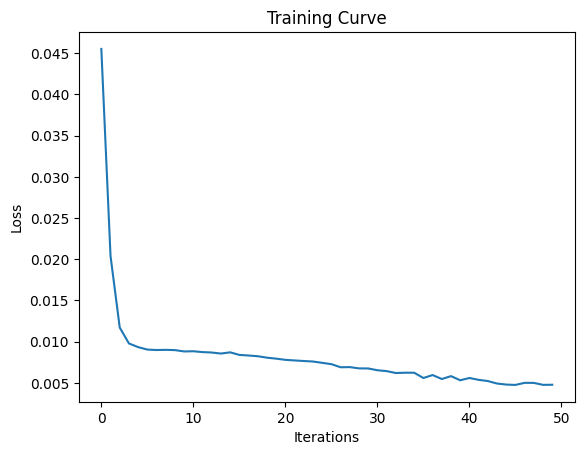

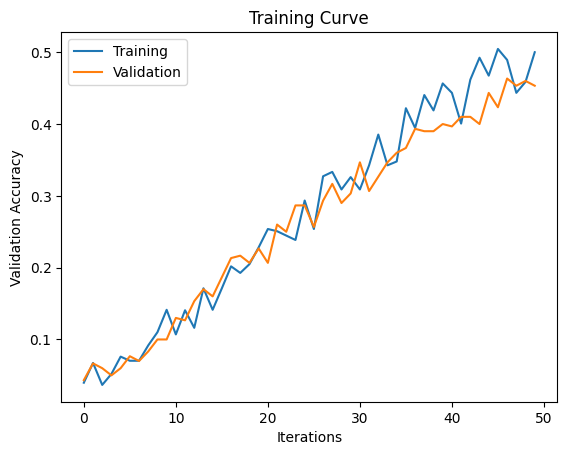

Final Training Accuracy: 0.5314285714285715
Final Validation Accuracy: 0.4533333333333333
Total time:   2369.72 s  Time per Epoch:  236.97 s 


In [ ]:
use_cuda = True
torch.cuda.empty_cache()

model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"
batch_size = 327

if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name, batch_size=batch_size, num_epochs=10)

*   From this testing we see if we reduced it to 20 classes and 100 images per class the training time was largely reduced. So next I am going to try with 50 classes.



In [ ]:
cd /content/gdrive/MyDrive/aps360largetest/Images

/content/gdrive/.shortcut-targets-by-id/1fLRn_-T5O6uh9f4YOAyHJSmQT7pYg_6y/Images


In [ ]:
# Define the paths
large_test_folder = '.'  # Current directory
large_test_train_folder = 'train_3'
large_test_val_folder = 'val_3'
large_test_test_folder = 'test_3'

In [ ]:

large_test_folder = '/content/gdrive/MyDrive/aps360largetest/Images'
large_test_train_folder = '/content/gdrive/MyDrive/aps360largetest/Images/train_3'
large_test_val_folder = '/content/gdrive/MyDrive/aps360largetest/Images/val_3'
large_test_test_folder = '/content/gdrive/MyDrive/aps360largetest/Images/test_3'

In [ ]:
first_time = True
num_images_per_class = 100
num_classes = 50
number_of_selected_class = 50
batch_size = 327

In [ ]:
first_time = True

In [ ]:
# Re split the data in another folder
if first_time:

  # Get all class folders, excluding "train", "valid", "test", "train_2", "valid_2", "test_2"
  all_classes = [f for f in os.listdir(large_test_folder) if os.path.isdir(os.path.join(large_test_folder, f)) and f not in ["train", "val", "test", "train_2", "val_2", "test_2"]]

  # Randomly select 50 classes
  selected_classes = random.sample(all_classes, number_of_selected_class)

  print("Splitting Images into 70% training, 15% validation, 15% testing")
  for class_folder in selected_classes:
      class_path = os.path.join(large_test_folder, class_folder)

      # Create corresponding class folders in train, val, test
      os.makedirs(os.path.join(large_test_train_folder, class_folder), exist_ok=True)
      os.makedirs(os.path.join(large_test_val_folder, class_folder), exist_ok=True)
      os.makedirs(os.path.join(large_test_test_folder, class_folder), exist_ok=True)

      # Get the list of image files for this class
      image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

      # Select up to 100 random images from the class
      num_images_to_select = min(num_images_per_class, len(image_files))
      selected_images = random.sample(image_files, num_images_to_select)

      # Split into train and temp (test + val)
      train_files, temp_files = train_test_split(selected_images, test_size=0.3, random_state=42)

      # Split temp into val and test
      val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

      # Copy the files to their respective folders
      for file in train_files:
          shutil.copy(os.path.join(class_path, file), os.path.join(large_test_train_folder, class_folder, file))
      for file in val_files:
          shutil.copy(os.path.join(class_path, file), os.path.join(large_test_val_folder, class_folder, file))
      for file in test_files:
          shutil.copy(os.path.join(class_path, file), os.path.join(large_test_test_folder, class_folder, file))

  first_time = False

else:
  print("Images Already Split")

Splitting Images into 70% training, 15% validation, 15% testing


In [ ]:
# Now we count to check if the data is correct
def count_images(folder):
    count = 0
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            count += len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    return count

train_count = count_images(large_test_train_folder)
val_count = count_images(large_test_val_folder)
test_count = count_images(large_test_test_folder)


total_count = train_count + val_count + test_count

print("Number of training images:", train_count, "({:.2f}%)".format(train_count/total_count * 100))
print("Number of validation images:", val_count, "({:.2f}%)".format(val_count/total_count * 100))
print("Number of testing images:", test_count, "({:.2f}%)".format(test_count/total_count * 100))

Number of training images: 3500 (70.00%)
Number of validation images: 750 (15.00%)
Number of testing images: 750 (15.00%)


In [ ]:
# Define data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match CNN input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize using ImageNet stats
])

# Load training data
train_dataset = datasets.ImageFolder(root='train_3', transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load validation data
val_dataset = datasets.ImageFolder(root='val_3', transform=data_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load test data
test_dataset = datasets.ImageFolder(root='test_3', transform=data_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
num_classes = 50

alexnet = models.alexnet(pretrained=True)

#freeze model parameters, those pretrained alexnet parameters won't be updated during training
for param in alexnet.parameters():
  param.requires_grad = False

# We are adding final layers to AlexNet to fit our tasks for Transfer Learning
# In this case, since we are using small net data with only 5 classes,
# we are using small hidden layer size of 512 and drop out rate
# of 0.6 to make the model more accurate
alexnet.classifier.add_module("4", nn.Linear(4096, 512)) #softmax not added because we're using crossentropy
alexnet.classifier.add_module("6", nn.Dropout(p=0.5, inplace=False))
alexnet.classifier.add_module("7", nn.Linear(512, 256))
alexnet.classifier.add_module("8", nn.ReLU(inplace=True))
alexnet.classifier.add_module("9", nn.Linear(256, num_classes))
alexnet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

CUDA is not available.  Training on CPU ...
Using alexnet
Iteration:  1 Progress:   0.91  % Time Elapsed:  94.94 s 
Iteration:  2 Progress:   1.82  % Time Elapsed:  165.41 s 
Iteration:  3 Progress:   2.73  % Time Elapsed:  230.51 s 
Iteration:  4 Progress:   3.64  % Time Elapsed:  294.66 s 
Iteration:  5 Progress:   4.55  % Time Elapsed:  358.93 s 
Iteration:  6 Progress:   5.45  % Time Elapsed:  423.29 s 
Iteration:  7 Progress:   6.36  % Time Elapsed:  485.90 s 
Iteration:  8 Progress:   7.27  % Time Elapsed:  554.27 s 
Iteration:  9 Progress:   8.18  % Time Elapsed:  630.43 s 
Iteration:  10 Progress:   9.09  % Time Elapsed:  700.15 s 
Iteration:  11 Progress:  10.00  % Time Elapsed:  755.35 s 
Epoch 0 Finished.  Time per Epoch:  755.35 s 
Iteration:  12 Progress:  10.91  % Time Elapsed:  817.99 s 
Iteration:  13 Progress:  11.82  % Time Elapsed:  898.60 s 
Iteration:  14 Progress:  12.73  % Time Elapsed:  979.42 s 
Iteration:  15 Progress:  13.64  % Time Elapsed:  1051.39 s 
Itera

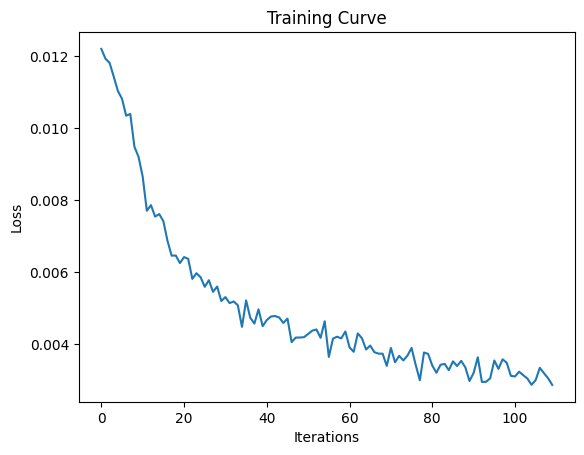

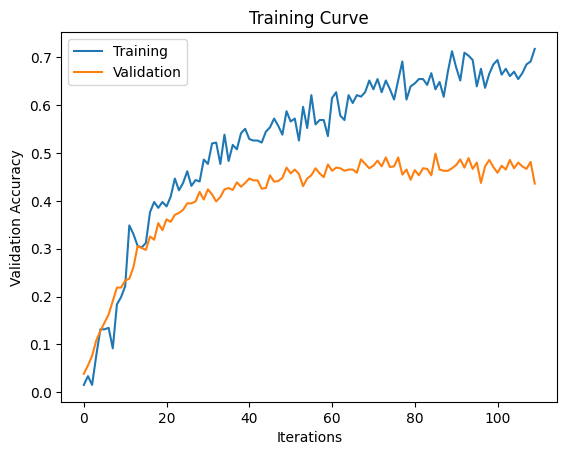

Final Training Accuracy: 0.7154285714285714
Final Validation Accuracy: 0.436
Total time:   7379.85 s  Time per Epoch:  737.99 s 


In [ ]:
use_cuda = True
torch.cuda.empty_cache()

model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"


if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name, batch_size=batch_size, num_epochs=10)

*   from the above, using data set of 50 classes and 100 samples per class gave us a result of 900 seconds training time. This is approximitely 15 minutes. For the sake of time, we will cap our model at this point and no longer increase data size.
*   The task now is trying to find the hyperparameters to make the model better.





*   In Here the training time was slower because at first we used GPU training. However later we exceeded our colab quota and was not able to use gpu anymore. So instead we changed back to CPU



CUDA is available!  Training on GPU ...
Using alexnet
Iteration:  1 Progress:   0.71  % Time Elapsed:  324.96 s 
Iteration:  2 Progress:   1.43  % Time Elapsed:  415.73 s 
Iteration:  3 Progress:   2.14  % Time Elapsed:  510.18 s 
Iteration:  4 Progress:   2.86  % Time Elapsed:  606.89 s 
Iteration:  5 Progress:   3.57  % Time Elapsed:  700.26 s 
Iteration:  6 Progress:   4.29  % Time Elapsed:  797.00 s 
Iteration:  7 Progress:   5.00  % Time Elapsed:  893.47 s 
Iteration:  8 Progress:   5.71  % Time Elapsed:  989.81 s 
Iteration:  9 Progress:   6.43  % Time Elapsed:  1084.89 s 
Iteration:  10 Progress:   7.14  % Time Elapsed:  1182.10 s 
Iteration:  11 Progress:   7.86  % Time Elapsed:  1276.07 s 
Iteration:  12 Progress:   8.57  % Time Elapsed:  1373.08 s 
Iteration:  13 Progress:   9.29  % Time Elapsed:  1469.20 s 
Iteration:  14 Progress:  10.00  % Time Elapsed:  1533.31 s 
Epoch 0 Finished.  Time per Epoch:  1533.31 s 
Iteration:  15 Progress:  10.71  % Time Elapsed:  1540.79 s 
I

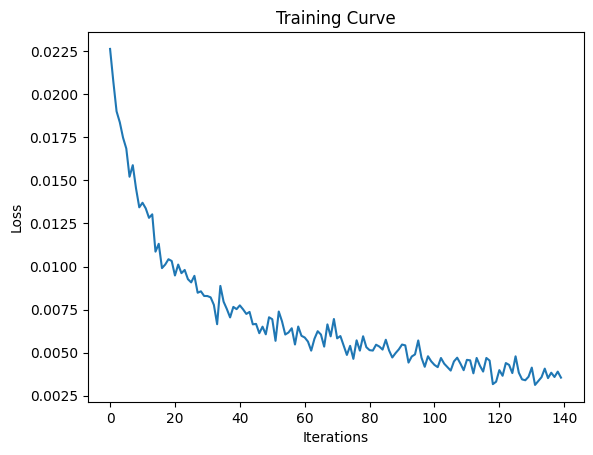

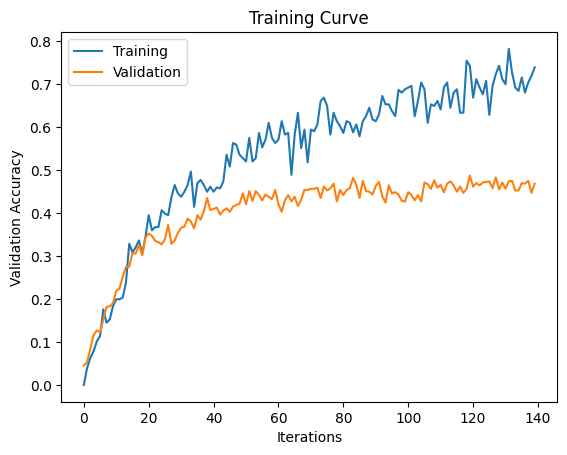

Final Training Accuracy: 0.7222857142857143
Final Validation Accuracy: 0.468
Total time:   2460.17 s  Time per Epoch:  246.02 s 


In [ ]:
#Trying Batch size 256
use_cuda = True
torch.cuda.empty_cache()
batch_size = 256
model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"


if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name, batch_size=batch_size, num_epochs=10)

CUDA is not available.  Training on CPU ...
Using alexnet
Iteration:  1 Progress:   1.82  % Time Elapsed:  66.16 s 
Iteration:  2 Progress:   3.64  % Time Elapsed:  130.88 s 
Iteration:  3 Progress:   5.45  % Time Elapsed:  199.43 s 
Iteration:  4 Progress:   7.27  % Time Elapsed:  267.18 s 
Iteration:  5 Progress:   9.09  % Time Elapsed:  332.79 s 
Iteration:  6 Progress:  10.91  % Time Elapsed:  395.16 s 
Iteration:  7 Progress:  12.73  % Time Elapsed:  458.08 s 
Iteration:  8 Progress:  14.55  % Time Elapsed:  520.70 s 
Iteration:  9 Progress:  16.36  % Time Elapsed:  582.79 s 
Iteration:  10 Progress:  18.18  % Time Elapsed:  645.14 s 
Iteration:  11 Progress:  20.00  % Time Elapsed:  705.28 s 
Epoch 0 Finished.  Time per Epoch:  705.28 s 
Iteration:  12 Progress:  21.82  % Time Elapsed:  771.98 s 
Iteration:  13 Progress:  23.64  % Time Elapsed:  840.10 s 
Iteration:  14 Progress:  25.45  % Time Elapsed:  909.20 s 
Iteration:  15 Progress:  27.27  % Time Elapsed:  977.32 s 
Iterat

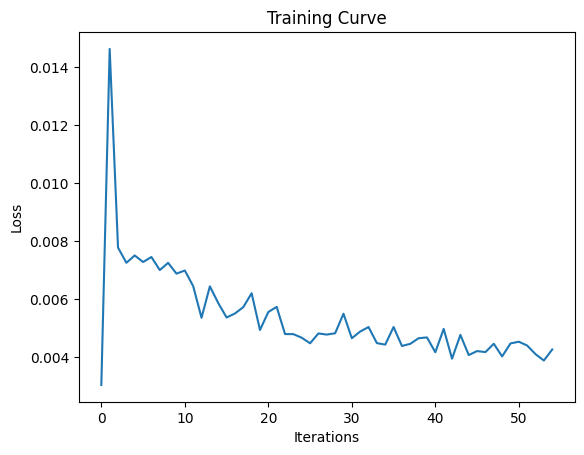

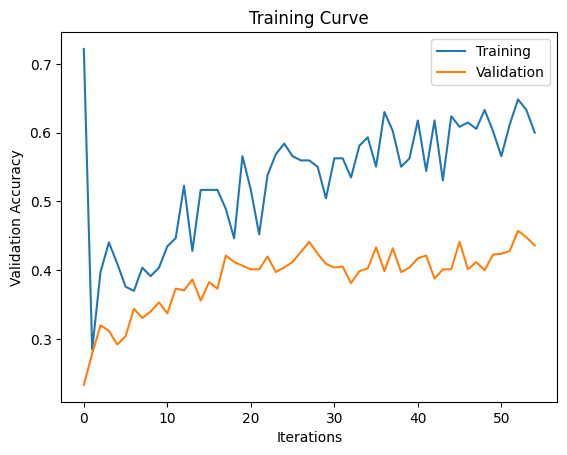

Final Training Accuracy: 0.6265714285714286
Final Validation Accuracy: 0.436
Total time:   3618.25 s  Time per Epoch:  723.65 s 


In [ ]:
#Trying Batch size 300, learning rate = 0.003
use_cuda = True
torch.cuda.empty_cache()
model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"


if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name,learning_rate = 0.003, batch_size=300, num_epochs=5)

CUDA is not available.  Training on CPU ...
Using alexnet
Iteration:  1 Progress:   1.82  % Time Elapsed:  63.76 s 
Iteration:  2 Progress:   3.64  % Time Elapsed:  126.48 s 
Iteration:  3 Progress:   5.45  % Time Elapsed:  188.40 s 
Iteration:  4 Progress:   7.27  % Time Elapsed:  252.41 s 
Iteration:  5 Progress:   9.09  % Time Elapsed:  315.86 s 
Iteration:  6 Progress:  10.91  % Time Elapsed:  378.95 s 
Iteration:  7 Progress:  12.73  % Time Elapsed:  441.19 s 
Iteration:  8 Progress:  14.55  % Time Elapsed:  505.08 s 
Iteration:  9 Progress:  16.36  % Time Elapsed:  574.25 s 
Iteration:  10 Progress:  18.18  % Time Elapsed:  637.35 s 
Iteration:  11 Progress:  20.00  % Time Elapsed:  690.81 s 
Epoch 0 Finished.  Time per Epoch:  690.81 s 
Iteration:  12 Progress:  21.82  % Time Elapsed:  752.82 s 
Iteration:  13 Progress:  23.64  % Time Elapsed:  816.38 s 
Iteration:  14 Progress:  25.45  % Time Elapsed:  879.93 s 
Iteration:  15 Progress:  27.27  % Time Elapsed:  942.99 s 
Iterat

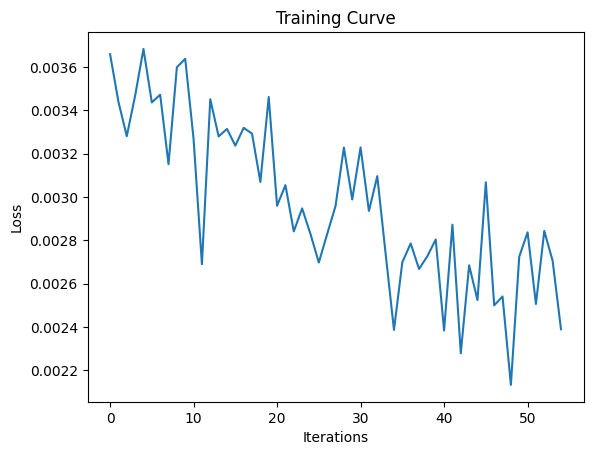

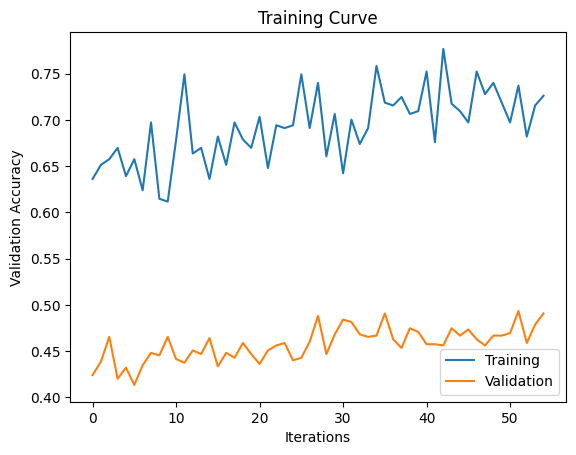

Final Training Accuracy: 0.7377142857142858
Final Validation Accuracy: 0.49066666666666664
Total time:   3569.06 s  Time per Epoch:  713.81 s 


In [ ]:
# now tring batch size = 327, learning rate = 0.0008
use_cuda = True
torch.cuda.empty_cache()
model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"


if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name,learning_rate = 0.0008, batch_size=327, num_epochs=5)

CUDA is not available.  Training on CPU ...
Using alexnet
Iteration:  1 Progress:   1.82  % Time Elapsed:  68.05 s 
Iteration:  2 Progress:   3.64  % Time Elapsed:  136.60 s 
Iteration:  3 Progress:   5.45  % Time Elapsed:  202.75 s 
Iteration:  4 Progress:   7.27  % Time Elapsed:  270.14 s 
Iteration:  5 Progress:   9.09  % Time Elapsed:  339.02 s 
Iteration:  6 Progress:  10.91  % Time Elapsed:  406.66 s 
Iteration:  7 Progress:  12.73  % Time Elapsed:  473.76 s 
Iteration:  8 Progress:  14.55  % Time Elapsed:  541.07 s 
Iteration:  9 Progress:  16.36  % Time Elapsed:  609.13 s 
Iteration:  10 Progress:  18.18  % Time Elapsed:  676.33 s 
Iteration:  11 Progress:  20.00  % Time Elapsed:  735.47 s 
Epoch 0 Finished.  Time per Epoch:  735.48 s 
Iteration:  12 Progress:  21.82  % Time Elapsed:  804.00 s 
Iteration:  13 Progress:  23.64  % Time Elapsed:  871.27 s 
Iteration:  14 Progress:  25.45  % Time Elapsed:  938.51 s 
Iteration:  15 Progress:  27.27  % Time Elapsed:  1006.37 s 
Itera

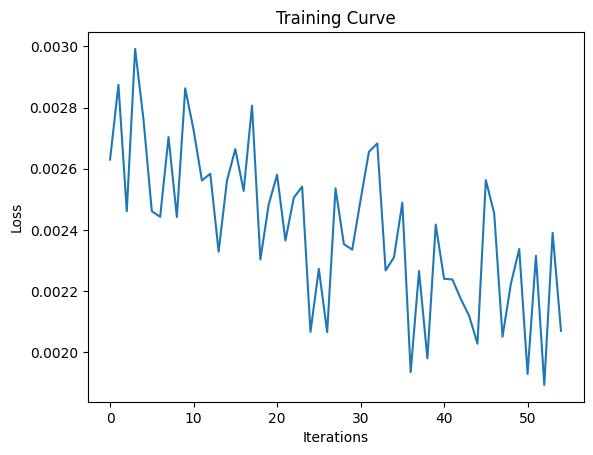

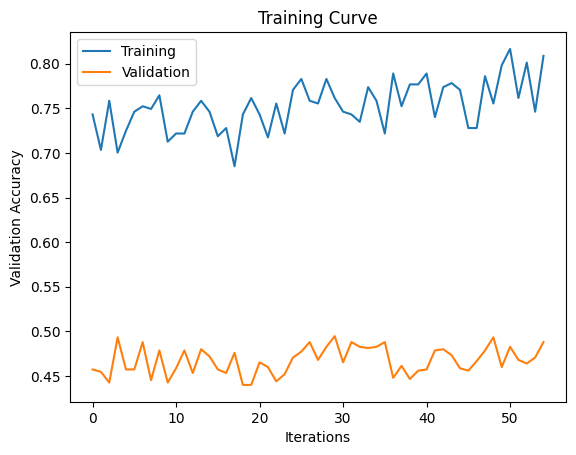

Final Training Accuracy: 0.7742857142857142
Final Validation Accuracy: 0.488
Total time:   3696.44 s  Time per Epoch:  739.29 s 


In [ ]:
# now tring batch size = 327, learning rate = 0.0015
use_cuda = True
torch.cuda.empty_cache()
model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"


if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name,learning_rate = 0.00015, batch_size=327, num_epochs=5)

CUDA is not available.  Training on CPU ...
Using alexnet
Iteration:  1 Progress:   1.82  % Time Elapsed:  67.20 s 
Iteration:  2 Progress:   3.64  % Time Elapsed:  135.89 s 
Iteration:  3 Progress:   5.45  % Time Elapsed:  205.13 s 
Iteration:  4 Progress:   7.27  % Time Elapsed:  274.43 s 
Iteration:  5 Progress:   9.09  % Time Elapsed:  345.52 s 
Iteration:  6 Progress:  10.91  % Time Elapsed:  414.79 s 
Iteration:  7 Progress:  12.73  % Time Elapsed:  484.49 s 
Iteration:  8 Progress:  14.55  % Time Elapsed:  554.13 s 
Iteration:  9 Progress:  16.36  % Time Elapsed:  623.60 s 
Iteration:  10 Progress:  18.18  % Time Elapsed:  691.84 s 
Iteration:  11 Progress:  20.00  % Time Elapsed:  750.82 s 
Epoch 0 Finished.  Time per Epoch:  750.83 s 
Iteration:  12 Progress:  21.82  % Time Elapsed:  820.70 s 
Iteration:  13 Progress:  23.64  % Time Elapsed:  889.77 s 
Iteration:  14 Progress:  25.45  % Time Elapsed:  958.97 s 
Iteration:  15 Progress:  27.27  % Time Elapsed:  1028.22 s 
Itera

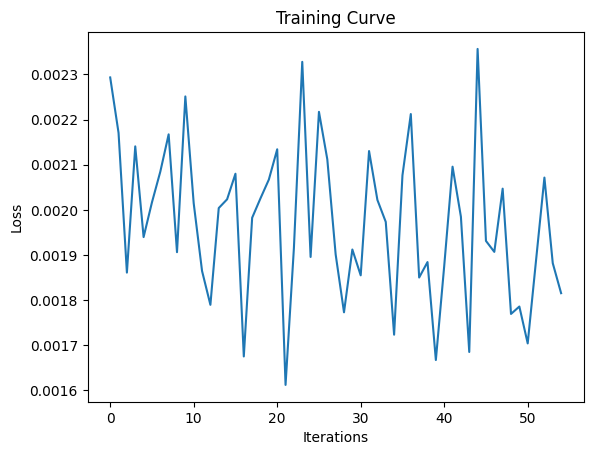

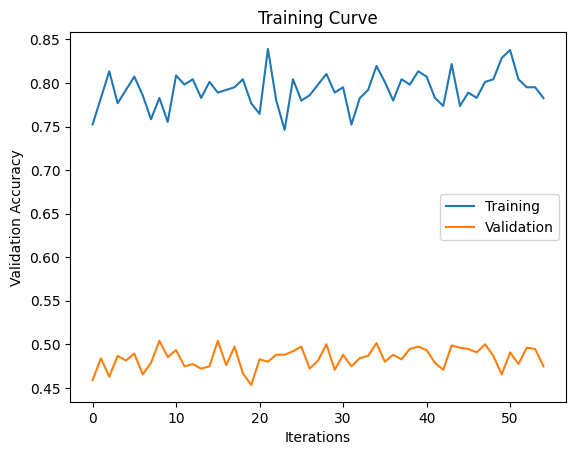

Final Training Accuracy: 0.8011428571428572
Final Validation Accuracy: 0.4746666666666667
Total time:   3734.76 s  Time per Epoch:  746.95 s 


In [ ]:
# now tring batch size = 327, learning rate = 0.0015
use_cuda = True
torch.cuda.empty_cache()
model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"


if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model_alex, model_name,learning_rate = 0.00018, batch_size=327, num_epochs=5)

*  Now that we find the hyperparameters, we want to use the test data to see how well our model predicts on unseen data.


In [ ]:
test_accuracy = get_accuracy_of_transfer(model_alex, test_loader)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 78.77%


*   To gain more testing expernence, we introduce a dog picture of our own to see how our model predicts.



In [ ]:
from PIL import Image
image1 = Image.open('/content/gdrive/MyDrive/test_images/dog_with_person.png')
image2 = Image.open('/content/gdrive/MyDrive/test_images/dog_with_elevator.jpg')
image3 = Image.open('/content/gdrive/MyDrive/test_images/dog_with_tree.jpg')
image4 = Image.open('/content/gdrive/MyDrive/test_images/dog1_1.jpg')
image5 = Image.open('/content/gdrive/MyDrive/test_images/dog1_2.jpg')
image6 = Image.open('/content/gdrive/MyDrive/test_images/dog1_3.jpg')

In [ ]:
# Define data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match CNN input
    transforms.ToTensor(),
    transforms.Lambda(lambda image: image[:3, :, :]),  # Select only the first 3 channels (RGB)
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize using ImageNet stats
])

In [ ]:
image1_tensor = data_transform(image1)
image1_tensor = image1_tensor.unsqueeze(0)

with torch.no_grad():
    output = model_alex(image1_tensor)
    _, predicted = torch.max(output, 1)

print("Predicted class:", predicted.item())

Predicted class: 21


In [ ]:
image2_tensor = data_transform(image2)
image2_tensor = image2_tensor.unsqueeze(0)

with torch.no_grad():
    output = model_alex(image2_tensor)
    _, predicted = torch.max(output, 1)

print("Predicted class:", predicted.item())

Predicted class: 47


In [ ]:
image3_tensor = data_transform(image2)
image3_tensor = image3_tensor.unsqueeze(0)

with torch.no_grad():
    output = model_alex(image3_tensor)
    _, predicted = torch.max(output, 1)

print("Predicted class:", predicted.item())

Predicted class: 47


In [ ]:
image4_tensor = data_transform(image2)
image4_tensor = image4_tensor.unsqueeze(0)

with torch.no_grad():
    output = model_alex(image4_tensor)
    _, predicted = torch.max(output, 1)

print("Predicted class:", predicted.item())

Predicted class: 47


In [ ]:
image5_tensor = data_transform(image2)
image5_tensor = image5_tensor.unsqueeze(0)

with torch.no_grad():
    output = model_alex(image5_tensor)
    _, predicted = torch.max(output, 1)

print("Predicted class:", predicted.item())

Predicted class: 47


In [ ]:
image6_tensor = data_transform(image2)
image6_tensor = image6_tensor.unsqueeze(0)

with torch.no_grad():
    output = model_alex(image6_tensor)
    _, predicted = torch.max(output, 1)

print("Predicted class:", predicted.item())

Predicted class: 47


*   We see that, for image one our model predicted as n02104029-kuvasz, and for all other visions of the same dog our model predicted as miniature_poodle, which is correct. This may be that image1 is the only image where dog and person are in the same frame, and our model is having difficulties identify with the noise of a person.



In [ ]:
selected_classes[47]

'n02113712-miniature_poodle'

In [ ]:
selected_classes[21]

'n02104029-kuvasz'

*   Now, in order to further improve our model to detect dogs first (for example sepreate out from person when in the same frame), as this would probably make our model more accurate, we introduce the YOLO network.
*   We will build a two step pipeline, where YOLO is used first and then passed onto Alexnet to complete the whole identification process.





In [ ]:
# Load a pretrained YOLOv5n model
model = YOLO('yolov5n.pt')

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
image1_tensor = data_transform(image1)
image1_tensor = image1_tensor.unsqueeze(0)
results = model(image1_tensor, conf=0.5, iou=0.45)


0: 224x224 (no detections), 144.9ms
Speed: 0.0ms preprocess, 144.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
!pip install tensorflow tensorflow-hub

In [ ]:
import tensorflow_hub as hub

model = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

In [ ]:
import tensorflow as tf



image = tf.io.read_file('/content/gdrive/MyDrive/test_images/dog1_1.jpg')
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, (320, 320))  # Adjust size to model input size
# Cast to uint8 before normalization
image = tf.cast(image, tf.uint8)
input_tensor = tf.expand_dims(image, 0)
detections = model(input_tensor)

boxes = detections[0][0]
labels = detections[1][0]
confidences = detections[2][0]

In [ ]:
boxes

<tf.Tensor: shape=(100, 4), dtype=float32, numpy=
array([[     99.537,      116.35,      266.12,      216.04],
       [          0,      102.12,      29.457,      160.29],
       [     54.986,     0.81841,      216.01,      24.812],
       [     97.723,      116.93,      265.43,      215.88],
       [    0.48973,     0.64295,      20.187,      34.124],
       [     59.823,      0.9821,       248.4,      64.266],
       [     1.5789,           0,      94.878,      33.253],
       [     0.5579,      102.17,      5.3927,      148.72],
       [    0.39441,      1.4935,      35.683,       93.23],
       [     84.589,           0,      175.91,      26.114],
       [          0,      102.27,      29.705,      162.05],
       [     2.8284,      2.4051,      259.72,      132.48],
       [   0.064846,    0.048362,      40.322,      21.599],
       [     264.21,      250.99,      318.82,         319],
       [     1.5217,           0,      67.635,      171.51],
       [     113.71,     0.39804,  

In [ ]:
labels

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([    0.83491,     0.24371,     0.12737,     0.11894,    0.089375,    0.086398,    0.076971,    0.069539,    0.047926,    0.044499,    0.037999,    0.030359,    0.029531,    0.028646,    0.026893,    0.024326,    0.021595,    0.021227,    0.020017,    0.019586,    0.018358,    0.018237,    0.017601,    0.017352,
          0.017135,     0.01684,    0.016306,    0.015955,    0.015638,    0.015484,    0.013942,    0.013776,    0.013553,    0.013243,    0.013038,    0.013014,    0.012551,    0.012497,     0.01214,    0.011625,    0.011561,    0.011538,    0.011356,    0.010968,    0.010592,    0.010454,    0.010104,   0.0095906,
         0.0095274,   0.0094899,   0.0094129,   0.0093947,   0.0093231,   0.0092328,   0.0089764,   0.0089712,   0.0088961,   0.0086043,   0.0084208,     0.00841,    0.008401,   0.0082703,   0.0080962,   0.0080119,   0.0077206,   0.0077163,   0.0076836,   0.0076639,    0.007513,   0.0074997,   0.0074052,   0.0073

In [ ]:
confidences

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([         18,          51,          18,          18,           1,          18,          18,          51,           1,          88,          51,          18,           1,          18,           1,          18,          51,           1,          18,           1,          77,           1,           1,          34,
                18,          18,          18,           1,           1,          51,          18,           1,          47,           1,          18,          18,          60,          18,          37,           1,          18,           1,          51,          18,          42,          18,           1,          18,
                44,           1,           1,          44,           1,           1,           1,          34,           3,           1,           1,          37,           1,          51,          77,           1,          18,           1,           1,           1,           1,          47,           1,         

In [ ]:
dog_class_index = 15  # Replace with the actual dog class index
dog_indices = labels == dog_class_index
dog_boxes = boxes[dog_indices]

In [ ]:
dog_boxes

<tf.Tensor: shape=(0, 4), dtype=float32, numpy=array([], shape=(0, 4), dtype=float32)>

In [ ]:
model.names

AttributeError: '_UserObject' object has no attribute 'names'